
====== Analysis for Model A: Xt - Xt-1 = Zt + 0.3Zt-1, Zt ~ iid Normal(0, 2) ======

Summary Statistics:
Mean: -15.2397
Variance: 54.9160
Min: -25.5030
Max: 7.3049

Augmented Dickey-Fuller Test:
ADF Statistic: -2.7489
p-value: 0.0660
Critical Values:
   1%: -3.4645
   5%: -2.8766
   10%: -2.5748
Stationary: False

KPSS Test:
KPSS Statistic: 0.7057
p-value: 0.0130
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Stationary: False

Ljung-Box Test for White Noise:
Q-statistic at lag 20: 1778.0986
p-value: 0.0000
White Noise: False

Jarque-Bera Test for Normality:
JB Statistic: 75.7594
p-value: 0.0000
Skewness: 1.3438
Kurtosis: 1.3665
Normal Distribution: False


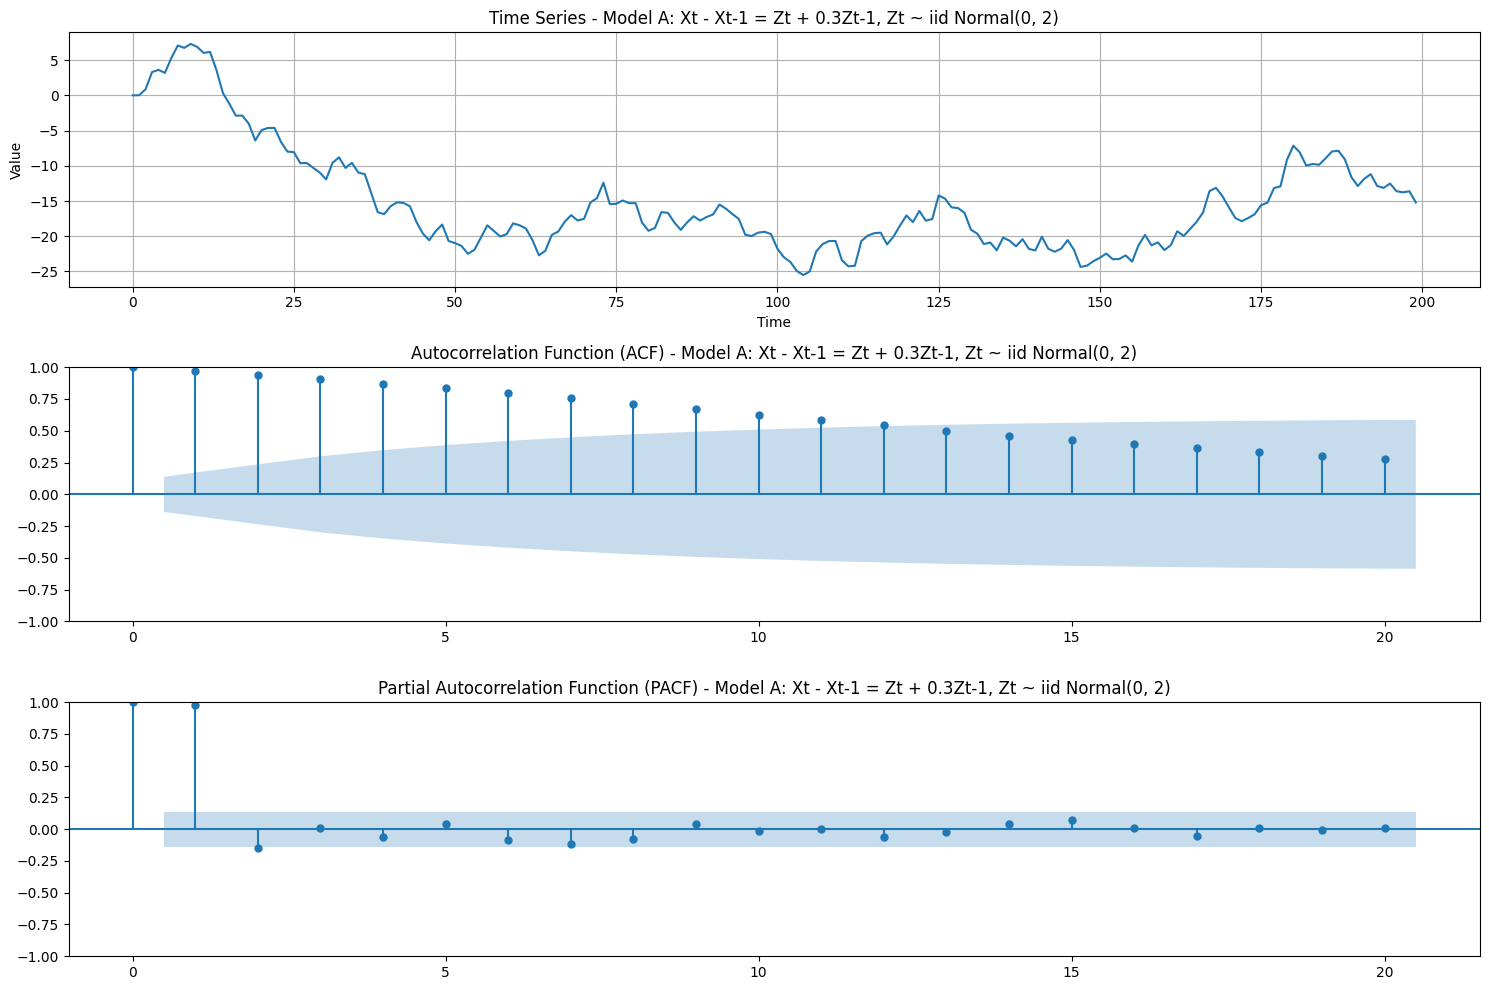


====== Analysis for Model B: Xt + 0.5Xt-1 = Zt - 0.7Zt-1, Zt ~ iid Normal(0, 4) ======

Summary Statistics:
Mean: 0.0067
Variance: 12.3688
Min: -11.3203
Max: 8.8598

Augmented Dickey-Fuller Test:
ADF Statistic: -9.1048
p-value: 0.0000
Critical Values:
   1%: -3.4645
   5%: -2.8766
   10%: -2.5748
Stationary: True

KPSS Test:
KPSS Statistic: 0.1327
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Stationary: True

Ljung-Box Test for White Noise:
Q-statistic at lag 20: 158.7115
p-value: 0.0000
White Noise: False

Jarque-Bera Test for Normality:
JB Statistic: 2.3503
p-value: 0.3088
Skewness: -0.1850
Kurtosis: 0.3810
Normal Distribution: True


/var/folders/7z/h__cj55j6hb0wqzy9tb5b92w0000gn/T/ipykernel_78328/935025886.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


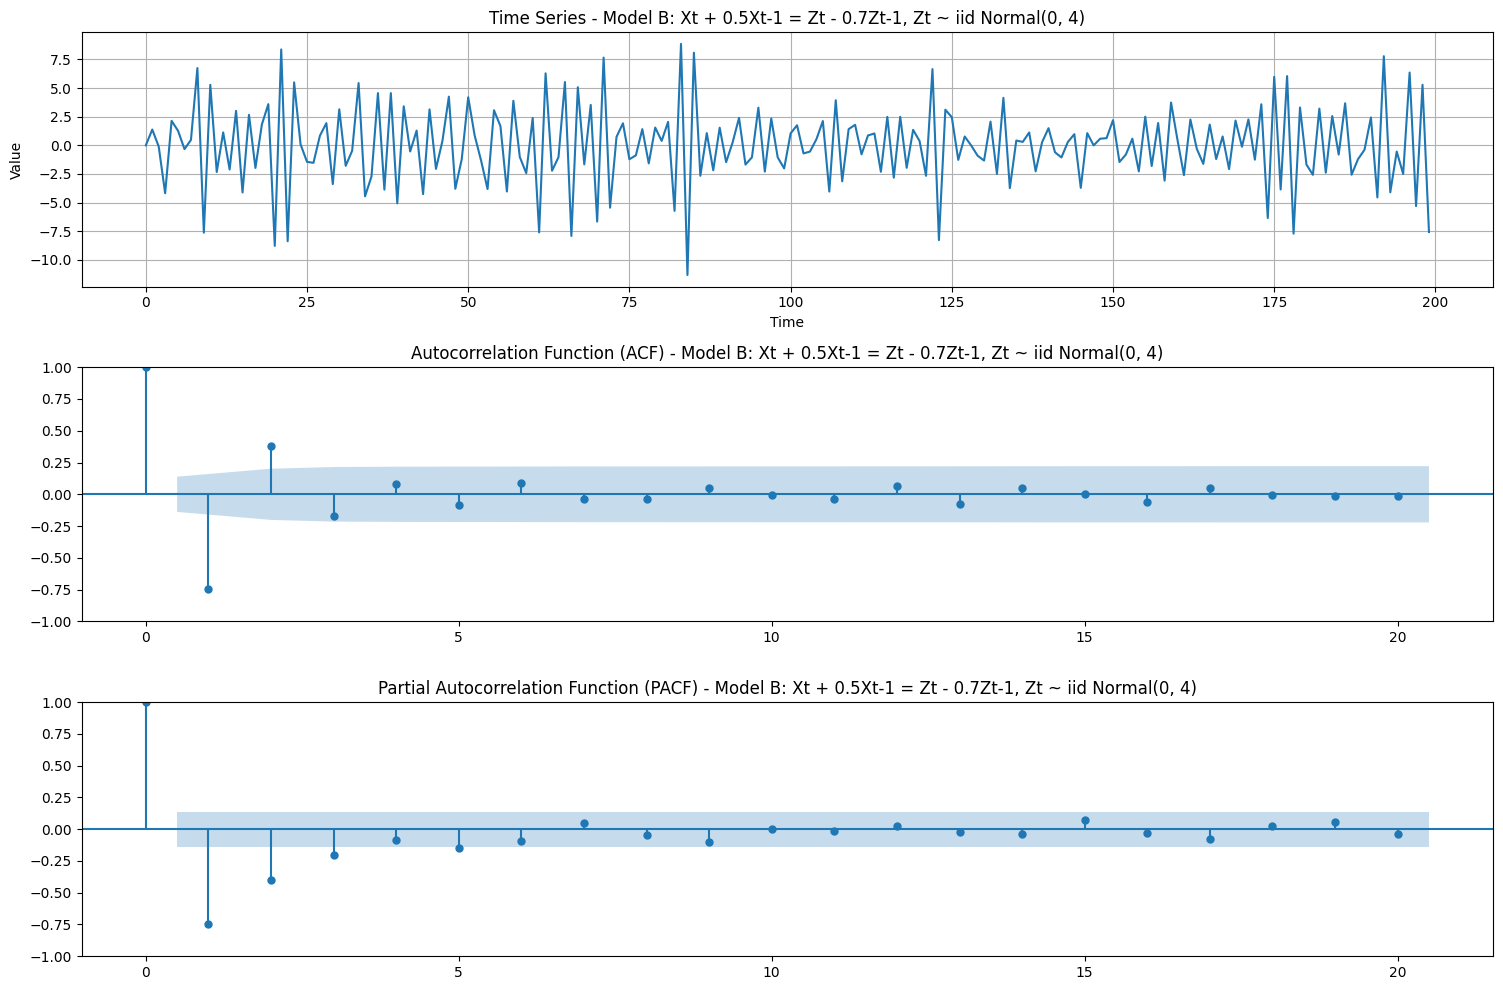


====== Analysis for Model C: Xt = 0.5Xt-1 + 0.3Xt-2 + Zt, Zt ~ iid t(5) ======

Summary Statistics:
Mean: -0.5219
Variance: 2.3341
Min: -4.7641
Max: 4.6653

Augmented Dickey-Fuller Test:
ADF Statistic: -4.9543
p-value: 0.0000
Critical Values:
   1%: -3.4638
   5%: -2.8763
   10%: -2.5746
Stationary: True

KPSS Test:
KPSS Statistic: 0.0813
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Stationary: True

Ljung-Box Test for White Noise:
Q-statistic at lag 20: 211.9966
p-value: 0.0000
White Noise: False

Jarque-Bera Test for Normality:
JB Statistic: 3.1610
p-value: 0.2059
Skewness: 0.2444
Kurtosis: 0.3746
Normal Distribution: True


/var/folders/7z/h__cj55j6hb0wqzy9tb5b92w0000gn/T/ipykernel_78328/935025886.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


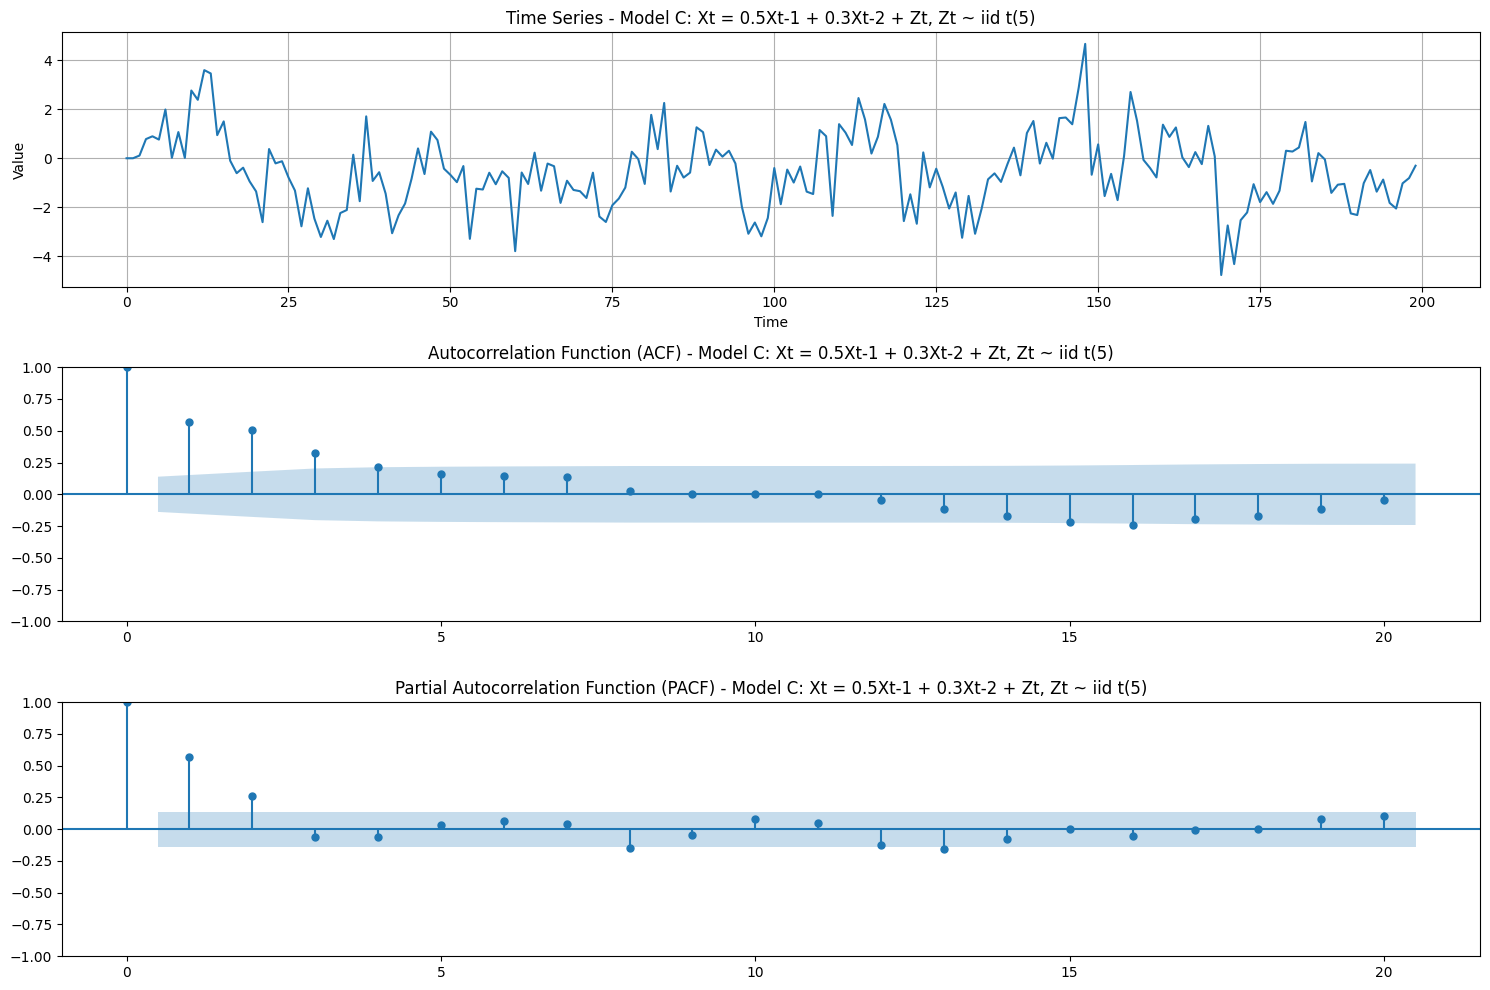


====== Analysis for Model D: Xt = Zt, where Zt ~ iid Laplace(0, 1) ======

Summary Statistics:
Mean: -0.0866
Variance: 2.0362
Min: -4.6172
Max: 4.9155

Augmented Dickey-Fuller Test:
ADF Statistic: -15.0773
p-value: 0.0000
Critical Values:
   1%: -3.4636
   5%: -2.8762
   10%: -2.5746
Stationary: True

KPSS Test:
KPSS Statistic: 0.3466
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Stationary: True

Ljung-Box Test for White Noise:
Q-statistic at lag 20: 13.2660
p-value: 0.8657
White Noise: True

Jarque-Bera Test for Normality:
JB Statistic: 11.0949
p-value: 0.0039
Skewness: 0.1542
Kurtosis: 1.1119
Normal Distribution: False


/var/folders/7z/h__cj55j6hb0wqzy9tb5b92w0000gn/T/ipykernel_78328/935025886.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c')


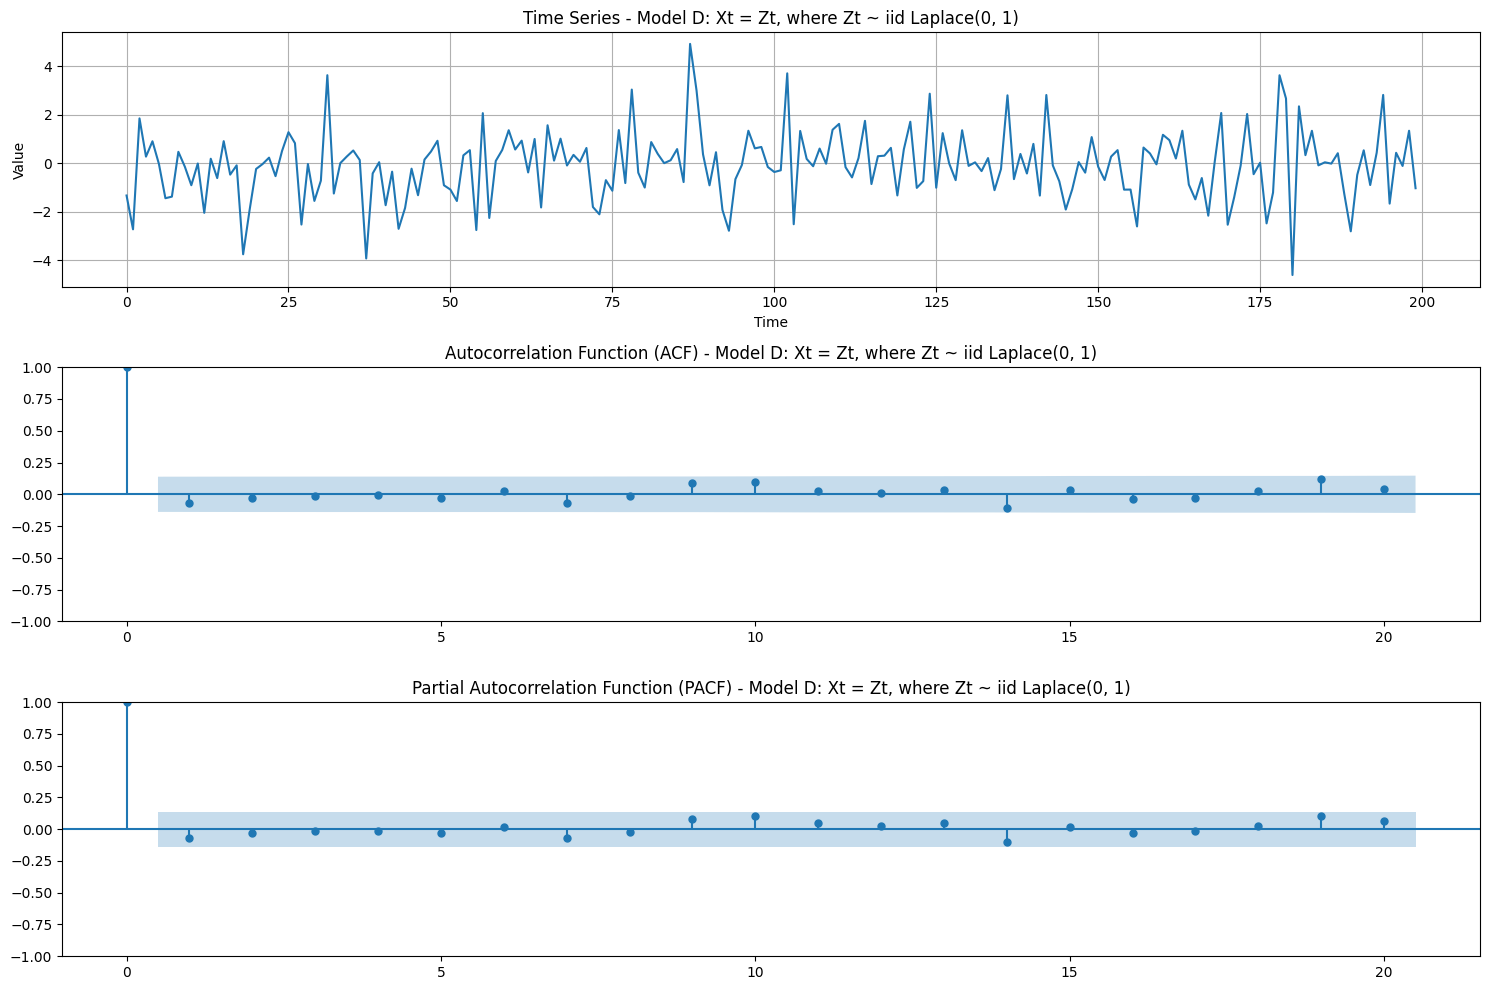

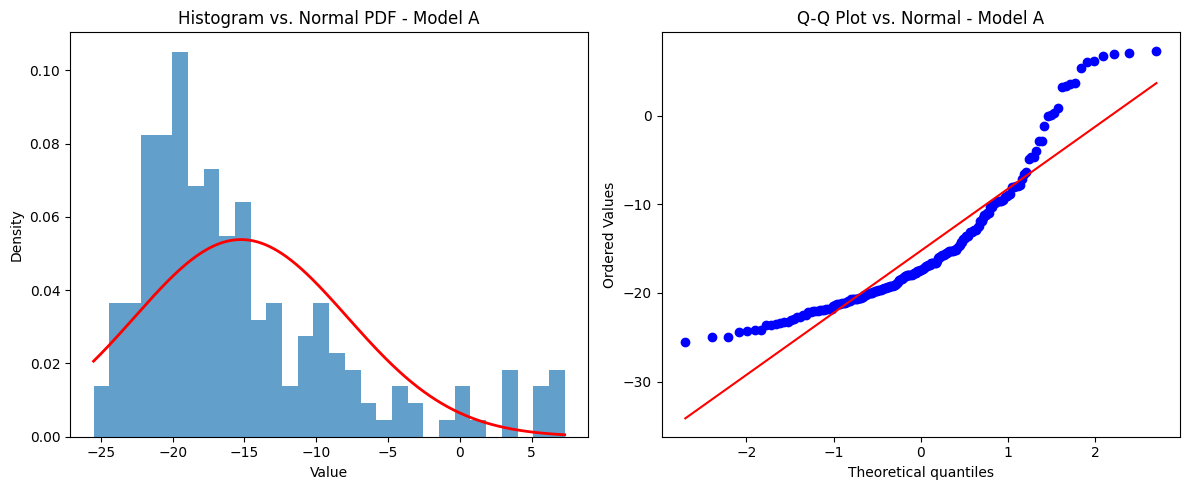

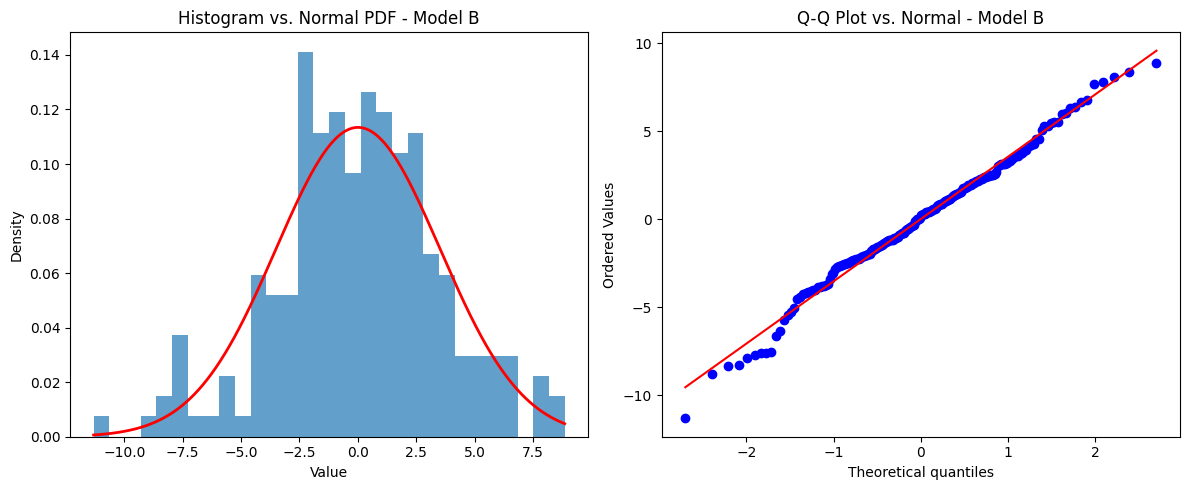

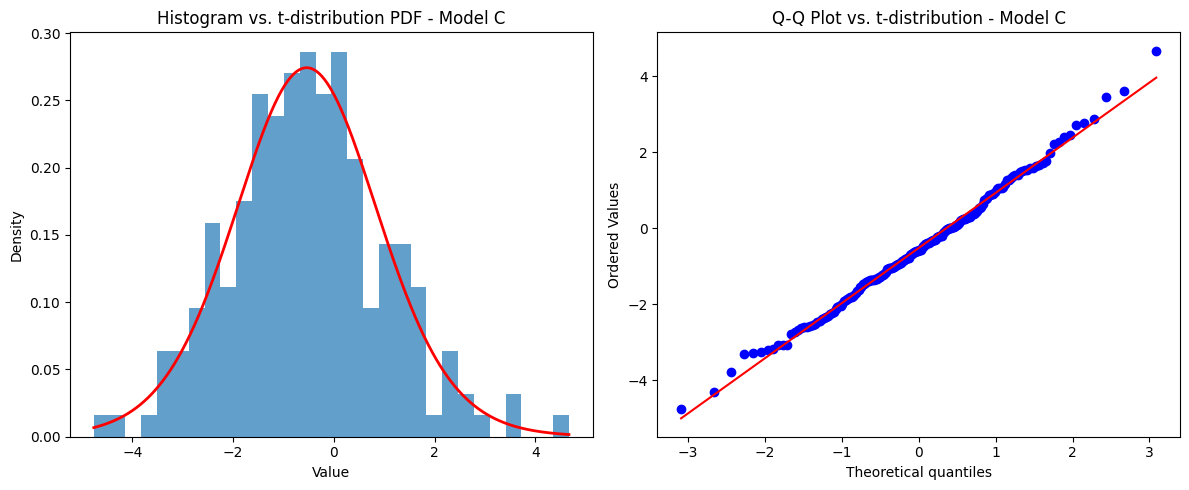

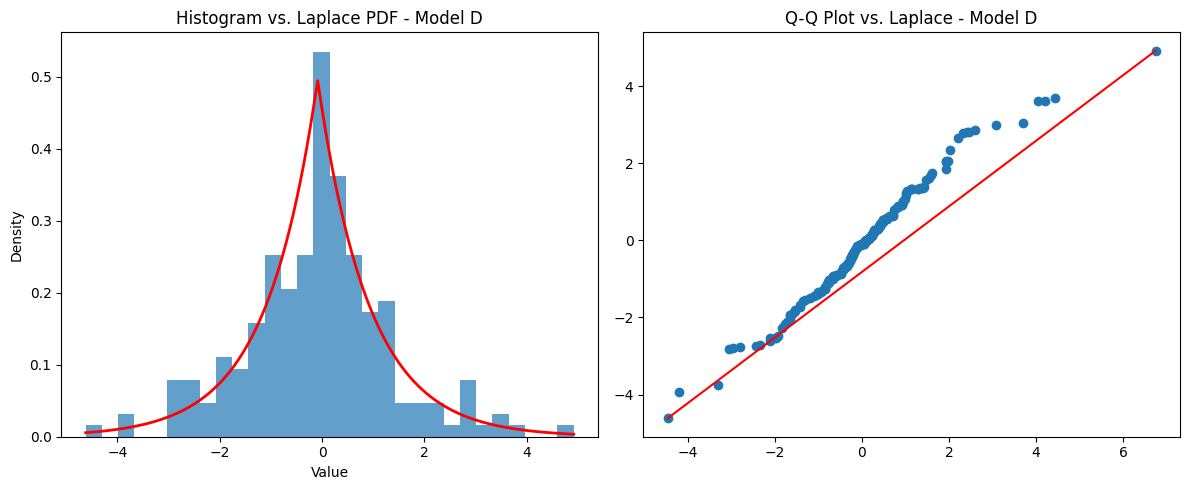

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
T = 200

# Function to generate the time series
def generate_models():
    # Model (a): Xt - Xt-1 = Zt + 0.3Zt-1, Zt ~ iid Normal(0, 2)
    # This is an ARIMA(0,1,1) model or IMA(1,1)
    z_a = np.random.normal(0, np.sqrt(2), T+1)
    x_a = np.zeros(T)
    for t in range(1, T):
        x_a[t] = x_a[t-1] + z_a[t] + 0.3 * z_a[t-1]
    
    # Model (b): Xt + 0.5Xt-1 = Zt - 0.7Zt-1, Zt ~ iid Normal(0, 4)
    # This is an ARMA(1,1) model
    z_b = np.random.normal(0, 2, T+1)  # std = sqrt(4)
    x_b = np.zeros(T)
    for t in range(1, T):
        x_b[t] = -0.5 * x_b[t-1] + z_b[t] - 0.7 * z_b[t-1]
    
    # Model (c): Xt = 0.5Xt-1 + 0.3Xt-2 + Zt, Zt ~ iid t-distributed with 5 degrees of freedom
    # This is an AR(2) model with t-distributed innovations
    z_c = stats.t.rvs(5, size=T)
    x_c = np.zeros(T)
    # Taking X1 and X2 as zero (as specified)
    for t in range(2, T):
        x_c[t] = 0.5 * x_c[t-1] + 0.3 * x_c[t-2] + z_c[t]
    
    # Model (d): Xt = Zt, where Zt is iid standard Laplace with pdf f(x) = (1/2)exp(-|x|)
    # This is white noise with Laplace distribution
    u = np.random.uniform(-0.5, 0.5, T)
    x_d = -np.sign(u) * np.log(1 - 2 * np.abs(u))
    
    return x_a, x_b, x_c, x_d

# Generate the time series
x_a, x_b, x_c, x_d = generate_models()

# Create DataFrames for each model
df_a = pd.DataFrame({'Model A': x_a})
df_b = pd.DataFrame({'Model B': x_b})
df_c = pd.DataFrame({'Model C': x_c})
df_d = pd.DataFrame({'Model D': x_d})

# Function to analyze time series properties
def analyze_series(series, model_name, max_lag=20):
    print(f"\n====== Analysis for {model_name} ======\n")
    
    # Summary statistics
    print("Summary Statistics:")
    print(f"Mean: {np.mean(series):.4f}")
    print(f"Variance: {np.var(series):.4f}")
    print(f"Min: {np.min(series):.4f}")
    print(f"Max: {np.max(series):.4f}")
    
    # ADF Test for stationarity
    adf_result = adfuller(series)
    print("\nAugmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.4f}")
    print(f"Stationary: {adf_result[1] < 0.05}")
    
    # KPSS Test for stationarity
    try:
        kpss_result = kpss(series, regression='c')
        print("\nKPSS Test:")
        print(f"KPSS Statistic: {kpss_result[0]:.4f}")
        print(f"p-value: {kpss_result[1]:.4f}")
        print("Critical Values:")
        for key, value in kpss_result[3].items():
            print(f"   {key}: {value:.4f}")
        print(f"Stationary: {kpss_result[1] > 0.05}")
    except:
        print("\nKPSS Test: Could not compute (may be due to perfect stationarity)")
    
    # Ljung-Box test for white noise
    lb_result = acorr_ljungbox(series, lags=max_lag)
    print("\nLjung-Box Test for White Noise:")
    print(f"Q-statistic at lag {max_lag}: {lb_result.iloc[-1, 0]:.4f}")
    print(f"p-value: {lb_result.iloc[-1, 1]:.4f}")
    print(f"White Noise: {lb_result.iloc[-1, 1] > 0.05}")
    
    # Jarque-Bera test for normality
    jb_result = stats.jarque_bera(series)
    print("\nJarque-Bera Test for Normality:")
    print(f"JB Statistic: {jb_result[0]:.4f}")
    print(f"p-value: {jb_result[1]:.4f}")
    print(f"Skewness: {stats.skew(series):.4f}")
    print(f"Kurtosis: {stats.kurtosis(series):.4f}")
    print(f"Normal Distribution: {jb_result[1] > 0.05}")

# Visualization for all models
def plot_model(series, model_name, max_lag=20):
    plt.figure(figsize=(15, 10))
    
    # Time Series Plot
    plt.subplot(3, 1, 1)
    plt.plot(series)
    plt.title(f'Time Series - {model_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    
    # ACF Plot
    plt.subplot(3, 1, 2)
    plot_acf(series, lags=max_lag, ax=plt.gca())
    plt.title(f'Autocorrelation Function (ACF) - {model_name}')
    
    # PACF Plot
    plt.subplot(3, 1, 3)
    plot_pacf(series, lags=max_lag, ax=plt.gca())
    plt.title(f'Partial Autocorrelation Function (PACF) - {model_name}')
    
    plt.tight_layout()
    plt.show()

# Analyze each model
analyze_series(x_a, "Model A: Xt - Xt-1 = Zt + 0.3Zt-1, Zt ~ iid Normal(0, 2)")
plot_model(x_a, "Model A: Xt - Xt-1 = Zt + 0.3Zt-1, Zt ~ iid Normal(0, 2)")

analyze_series(x_b, "Model B: Xt + 0.5Xt-1 = Zt - 0.7Zt-1, Zt ~ iid Normal(0, 4)")
plot_model(x_b, "Model B: Xt + 0.5Xt-1 = Zt - 0.7Zt-1, Zt ~ iid Normal(0, 4)")

analyze_series(x_c, "Model C: Xt = 0.5Xt-1 + 0.3Xt-2 + Zt, Zt ~ iid t(5)")
plot_model(x_c, "Model C: Xt = 0.5Xt-1 + 0.3Xt-2 + Zt, Zt ~ iid t(5)")

analyze_series(x_d, "Model D: Xt = Zt, where Zt ~ iid Laplace(0, 1)")
plot_model(x_d, "Model D: Xt = Zt, where Zt ~ iid Laplace(0, 1)")

# Compare distributions using histograms and QQ plots
def compare_distributions(series, model_name, theoretical_dist):
    plt.figure(figsize=(12, 5))
    
    # Histogram with theoretical PDF
    plt.subplot(1, 2, 1)
    plt.hist(series, bins=30, density=True, alpha=0.7)
    
    # Add theoretical PDF
    x = np.linspace(min(series), max(series), 1000)
    if theoretical_dist == 'normal':
        mu, sigma = np.mean(series), np.std(series)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
        plt.title(f'Histogram vs. Normal PDF - {model_name}')
    elif theoretical_dist == 'laplace':
        mu, b = np.mean(series), np.std(series) / np.sqrt(2)  # Laplace scale parameter
        plt.plot(x, stats.laplace.pdf(x, mu, b), 'r-', lw=2)
        plt.title(f'Histogram vs. Laplace PDF - {model_name}')
    elif theoretical_dist == 't':
        # For t-distribution, need to estimate parameters
        params = stats.t.fit(series)
        plt.plot(x, stats.t.pdf(x, *params), 'r-', lw=2)
        plt.title(f'Histogram vs. t-distribution PDF - {model_name}')
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    
    # QQ plot
    plt.subplot(1, 2, 2)
    if theoretical_dist == 'normal':
        stats.probplot(series, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot vs. Normal - {model_name}')
    elif theoretical_dist == 'laplace':
        # For Laplace QQ plot, use uniform and transform
        u = np.random.uniform(0, 1, len(series))
        laplace_quantiles = np.sign(u - 0.5) * (-np.log(1 - 2 * np.abs(u - 0.5)))
        plt.scatter(np.sort(laplace_quantiles), np.sort(series))
        plt.plot([min(laplace_quantiles), max(laplace_quantiles)], 
                 [min(series), max(series)], 'r-')
        plt.title(f'Q-Q Plot vs. Laplace - {model_name}')
    elif theoretical_dist == 't':
        # Use t-distribution with estimated parameters
        params = stats.t.fit(series)
        stats.probplot(series, dist=stats.t, sparams=params[0], plot=plt)
        plt.title(f'Q-Q Plot vs. t-distribution - {model_name}')
    
    plt.tight_layout()
    plt.show()

# Compare distributions
compare_distributions(x_a, "Model A", 'normal')
compare_distributions(x_b, "Model B", 'normal')
compare_distributions(x_c, "Model C", 't')
compare_distributions(x_d, "Model D", 'laplace')